# Hot and Cold
- For this analysis, I want to undestand general temperature makeup around the globe and find the hottest/coldest places on Earth.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Import city and country temperature data
cityTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
ctrTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [3]:
#List of continents
continents = ['North America','South America','Europe','Asia','Africa','Australia','Antarcita']

In [6]:
#Strangely, the country temperature dataset contained continent temp data.
#I removed the data and created a continent temperature dataset.

#Create new continent temp dataset
continentTemp = ctrTemp[ctrTemp['Country'].isin(continents)]
continentTemp = continentTemp.dropna()

#Remove continents from country temp
countryTemp = ctrTemp[~ctrTemp['Country'].isin(continents)]

#There were also a few copies which needed to be removed
countryTemp = countryTemp[~countryTemp['Country'].str.contains('(Europe)')]
countryTemp = countryTemp.dropna()


Average Temperature of the Globe is 17.50908180269621


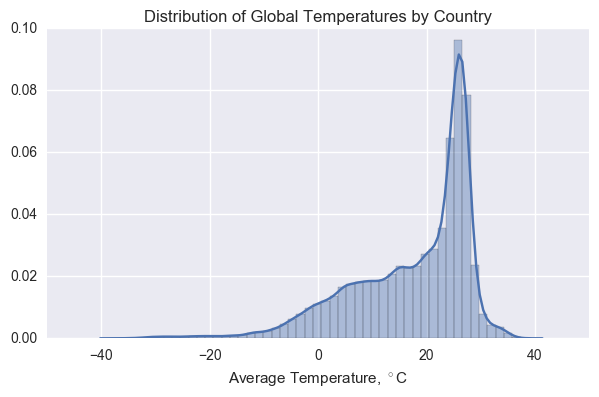

In [15]:
print('Average Temperature of the Globe is',countryTemp['AverageTemperature'].mean())
plt.figure(figsize=(7,4))
sns.distplot(countryTemp['AverageTemperature'])
sns.plt.title('Distribution of Global Temperatures by Country')
sns.plt.xlabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/countryhistogram.png", bbox_inches='tight',dpi=600)

In [17]:
#Separate cities into their respective quadrants
quadTemp = cityTemp
quadTemp['Year'] = quadTemp['dt'].apply(lambda x : x[:4])
quadTemp['NorthSouth'] = quadTemp['Latitude'].apply(lambda x : 'North' if x.find('N') > -1 else 'South')
quadTemp['EastWest'] = quadTemp['Longitude'].apply(lambda x : 'East' if x.find('E') > -1 else 'West')
quadTemp['Quadrant'] = quadTemp['NorthSouth']+quadTemp['EastWest']

In [21]:
#Calculate the average temperature for each city
quadTempAvgCity = quadTemp.groupby(['Quadrant','City']).mean().reset_index(drop=False)
quadTempAvgYear = quadTemp.groupby(['Quadrant','City','Year']).mean().reset_index(drop=False)

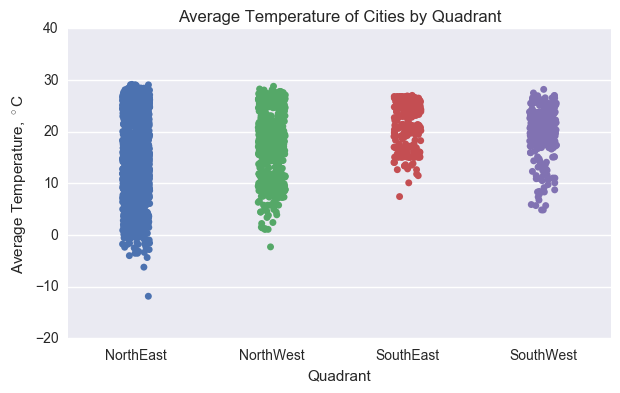

In [19]:
#Plot the various temperatures from each quadrant
plt.figure(figsize=(7,4))
sns.stripplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgCity, jitter=True)
sns.plt.title('Average Temperature of Cities by Quadrant')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/quadjitterplot.png", bbox_inches='tight', dpi=600)

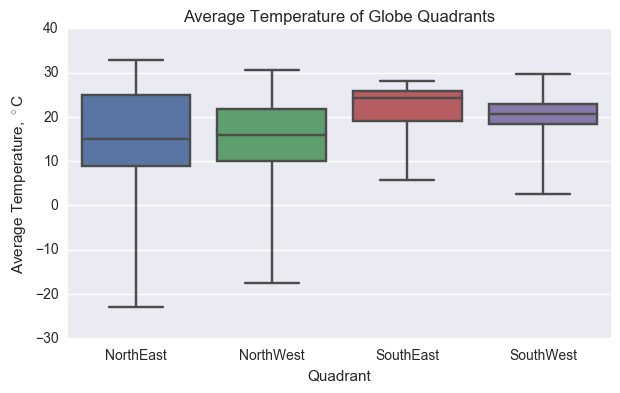

In [22]:
#Plot the temperatures from each quadrant using a boxplot
plt.figure(figsize=(7,4))
sns.boxplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgYear, whis=np.inf)
sns.plt.title('Average Temperature of Globe Quadrants')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/quadboxplot.png", bbox_inches='tight', dpi=600)

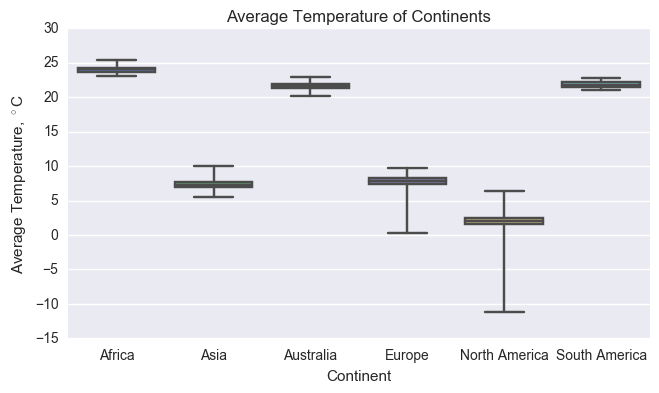

In [81]:
#Show the average temp with deviation of each continent
continentTemp['Year'] = continentTemp['dt'].apply(lambda x : x[:4])
continentTempAvg = continentTemp.groupby(['Country','Year']).mean().reset_index(drop=False)

#Average temperautre of 6/7 continents
plt.figure(figsize=(7.5,4))
sns.boxplot(x="Country", y="AverageTemperature", data=continentTempAvg, whis=np.inf)
sns.plt.title('Average Temperature of Continents')
sns.plt.xlabel('Continent')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/continentboxplot2.png", bbox_inches='tight', dpi=600)

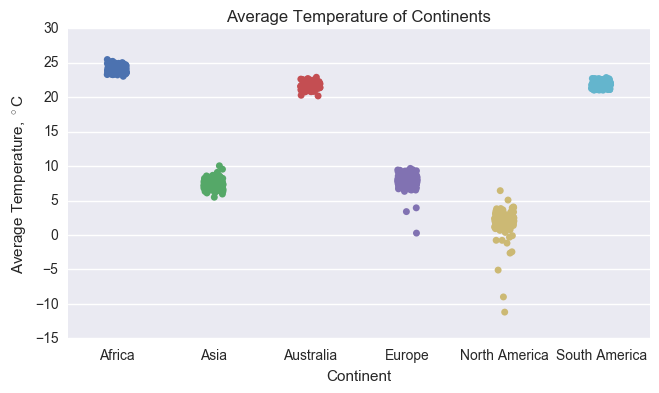

In [78]:
plt.figure(figsize=(7.5,4))
sns.stripplot(x="Country", y="AverageTemperature", data=continentTempAvg, jitter=True)
sns.plt.title('Average Temperature of Continents')
sns.plt.xlabel('Continent')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/continentjitterplot.png", bbox_inches='tight', dpi=600)

In [29]:
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x[:4])
countryTempAvg = countryTemp.groupby('Country').mean().reset_index(drop=False)
countryTempAvgYear = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)

Aruba's average temperature is 27.919836193362197
Senegal's average temperature is 27.96367697545071
Burkina Faso's average temperature is 28.070510744386546
Mali's average temperature is 28.440748456079785
Djibouti's average temperature is 28.821864862655328


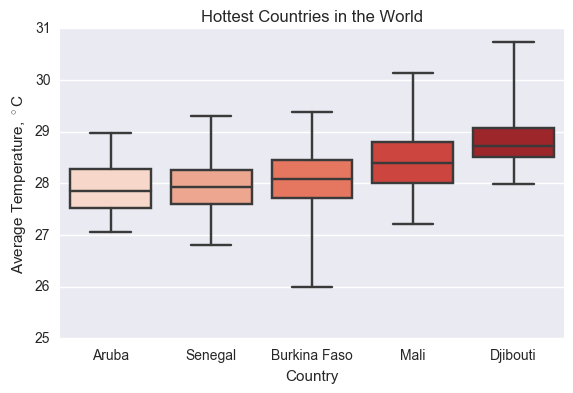

In [66]:
#five hottest countries in the world (on average)
hottestCountries = countryTempAvg.sort_values('AverageTemperature', ascending=False).head()
hotCountries = DataFrame()

for each in hottestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    hotCountries = hotCountries.append(holder)

hotCountriesYear = hotCountries.groupby(['Country','Year']).mean().reset_index(drop=False)
hotCountriesAvg = DataFrame()
hottestCountries = hottestCountries.sort_values('AverageTemperature')
for each in hottestCountries['Country']:
    holder = hotCountriesYear[hotCountriesYear['Country']==each]
    avgTemp = str(holder['AverageTemperature'].mean())
    print(each + "'s average temperature is " + avgTemp)
    hotCountriesAvg = hotCountriesAvg.append(holder)

plt.figure(figsize=(6.5,4))
sns.boxplot(x="Country", y="AverageTemperature", data=hotCountriesAvg, whis=np.inf, palette='Reds')
sns.plt.title('Hottest Countries in the World')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/hotcountryboxplot.png", bbox_inches='tight', dpi=600)

Greenland's average temperature is -18.58191230366492
Denmark's average temperature is -18.04759554973822
Svalbard And Jan Mayen's average temperature is -7.442218755010419
Russia's average temperature is -5.577972040954095
Canada's average temperature is -5.334680039315109


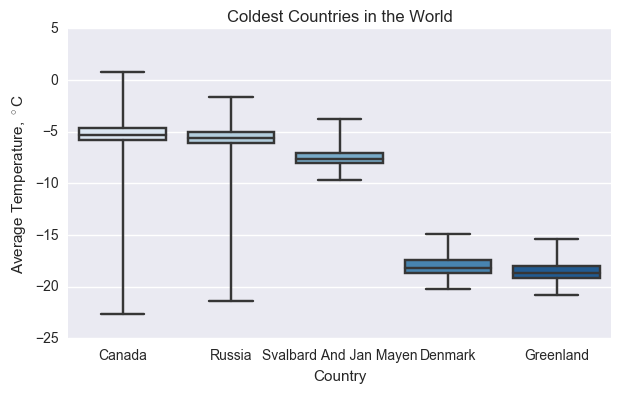

In [69]:
#five coldest countries in the world (on average)
coldestCountries = countryTempAvg.sort_values('AverageTemperature').head()
coldCountries = DataFrame()

#pull data for just top five coldest countries
for each in coldestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    coldCountries = coldCountries.append(holder)
#average the data
coldCountriesAvg = coldCountries.groupby(['Country','Year']).mean().reset_index(drop=False)

for each in coldestCountries['Country']:
    holder = coldCountriesAvg[coldCountriesAvg['Country']==each]
    avgTemp = str(holder['AverageTemperature'].mean())
    print(each + "'s average temperature is " + avgTemp)
    
#plot the data
plt.figure(figsize=(7,4))
sns.boxplot(x="Country", y="AverageTemperature", data=coldCountriesAvg.sort_values('AverageTemperature', ascending=False), whis=np.inf, palette='Blues' )
sns.plt.title('Coldest Countries in the World')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/coldcountryboxplot.png", bbox_inches='tight', dpi=600)

In [56]:
cityTempAvg = cityTemp.groupby('City').mean().reset_index(drop=False).sort_values('AverageTemperature')
coldestCities = cityTempAvg.head()
hottestCities = cityTempAvg.tail()

In [74]:
coldestCities.head()

,City,AverageTemperature,AverageTemperatureUncertainty
2134,Norilsk,-11.854750,1.722590
1635,Kyzyl,-6.222452,1.324871
615,Chita,-4.360300,1.152822
3172,Ust Ilimsk,-3.996800,1.267395
2898,Surgut,-3.538281,1.247918


Kassala's average temperature is 28.925507421150275
Niamey's average temperature is 29.039404525386317
Umm Durman's average temperature is 29.061975255914845
Khartoum's average temperature is 29.061975255914845
Jibuti's average temperature is 29.1581636145629


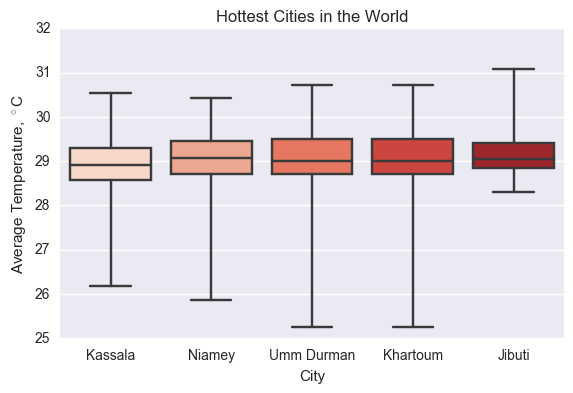

In [68]:
#Average temperature of the 5 hottest cities in the world
hotCities = DataFrame()

for each in hottestCities['City']:
    holder = cityTemp[cityTemp['City'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    hotCities = hotCities.append(holder)
    
hotCitiesYear = hotCities.groupby(['City','Year']).mean().reset_index(drop=False)
hotCitiesYear = hotCitiesYear.dropna()
hotCitiesAvg = DataFrame()
hottestCities = hottestCities.sort_values('AverageTemperature')
for each in hottestCities['City']:
    holder = hotCitiesYear[hotCitiesYear['City']==each]
    avgTemp = str(holder['AverageTemperature'].mean())
    print(each + "'s average temperature is " + avgTemp)
    hotCitiesAvg = hotCitiesAvg.append(holder)

plt.figure(figsize=(6.5,4))
sns.boxplot(x="City", y="AverageTemperature", data=hotCitiesAvg, whis=np.inf, palette='Reds')
sns.plt.title('Hottest Cities in the World')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/hotcityboxplot.png", bbox_inches='tight',dpi=600)

Norilsk's average temperature is -11.848821348797255
Kyzyl's average temperature is -6.222138874570444
Chita's average temperature is -4.361643427835049
Ust Ilimsk's average temperature is -3.998593170103092
Surgut's average temperature is -3.5346063606360647


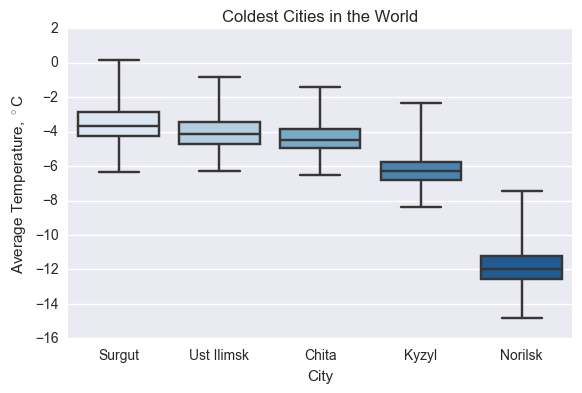

In [77]:
#Top five coldest cities in the world
coldCities = DataFrame()

for each in coldestCities['City']:
    holder = cityTemp[cityTemp['City'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    coldCities = coldCities.append(holder)
    
coldCitiesAvg = coldCities.groupby(['City','Year']).mean().reset_index(drop=False)

for each in coldestCities['City']:
    holder = coldCitiesAvg[coldCitiesAvg['City']==each]
    avgTemp = str(holder['AverageTemperature'].mean())
    print(each + "'s average temperature is " + avgTemp)
    
plt.figure(figsize=(6.5,4))
sns.boxplot(x="City", y="AverageTemperature", data=coldCitiesAvg.sort_values('AverageTemperature',ascending=False), whis=np.inf, palette='Blues')
sns.plt.title('Coldest Cities in the World')
sns.plt.ylabel('Average Temperature, $^\circ$C')
plt.savefig("./ana_1/coldcityboxplot.png", bbox_inches='tight',dpi=600)

In [60]:
cityTemp['Lat'] = cityTemp['Latitude'].apply(lambda x : float('-'+x[:-1]) if x.find('S')> -1 else float(x[:-1]))
cityTemp['Lon'] = cityTemp['Longitude'].apply(lambda x : float('-'+x[:-1]) if x.find('W')> -1 else float(x[:-1]))
cityTempAvg = cityTemp.groupby('City').mean().reset_index(drop=False)
# cityTempAvg.head()
lat = cityTempAvg['Lat'].values
lon = cityTempAvg['Lon'].values
temp = cityTempAvg['AverageTemperature'].values

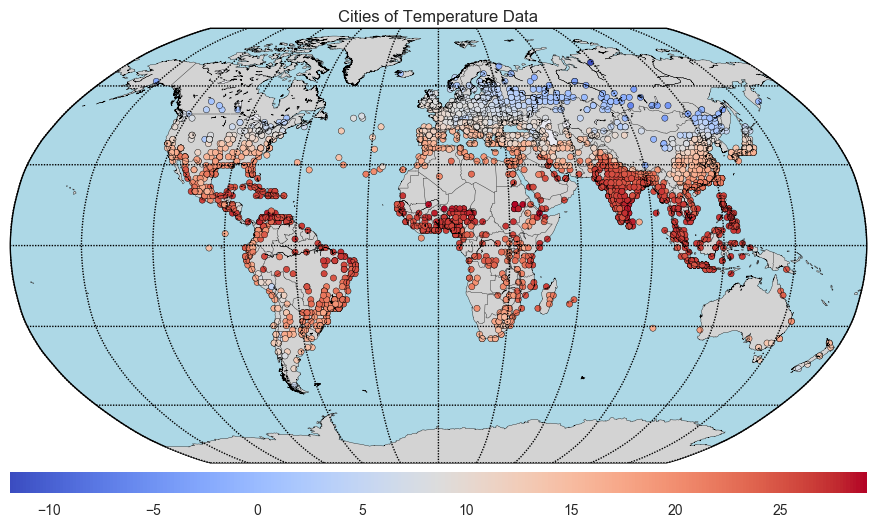

In [61]:
plt.figure(figsize=(12,6))
amap = Basemap(projection='robin',lat_0=0,lon_0=0,resolution='l')
amap.drawmapboundary(fill_color='lightblue')
# draw coastlines, country boundaries, fill continents.
amap.drawcoastlines(linewidth=0.25)
amap.drawcountries(linewidth=0.25)
amap.fillcontinents(color='lightgrey',zorder=0)
amap.drawmeridians(np.arange(0, 360, 30))
amap.drawparallels(np.arange(-90, 90, 30))
x,y = amap(lon, lat)
amap.scatter(x, y, c=temp, cmap='coolwarm')
amap.colorbar(location='bottom')
sns.plt.title('Cities of Temperature Data')
plt.savefig("./ana_1/worldHeat.png", bbox_inches='tight',dpi=600)
plt.show()